# Dự đoán bệnh tiểu đường bằng học máy
Bệnh tiểu đường là một bệnh mãn tính xảy ra khi tuyến tụy không sản xuất đủ insulin hoặc khi cơ thể không thể sử dụng hiệu quả lượng insulin mà nó sản xuất. Insulin là một loại hormone điều hòa lượng đường trong máu. Tăng đường huyết, còn gọi là tăng đường huyết hoặc tăng đường huyết, là hậu quả phổ biến của bệnh tiểu đường không kiểm soát được và theo thời gian dẫn đến tổn thương nghiêm trọng cho nhiều hệ thống của cơ thể, đặc biệt là dây thần kinh và mạch máu.

Bộ dữ liệu này có nguồn gốc từ Viện Tiểu đường, Tiêu hóa và Bệnh thận Quốc gia. Mục tiêu của tập dữ liệu là dự đoán chẩn đoán xem bệnh nhân có mắc bệnh tiểu đường hay không, dựa trên các phép đo chẩn đoán nhất định có trong tập dữ liệu. Một số hạn chế đã được đặt ra đối với việc lựa chọn các trường hợp này từ cơ sở dữ liệu lớn hơn. Đặc biệt, tất cả bệnh nhân ở đây đều là nữ, ít nhất 21 tuổi.

## Mục tiêu dự án
Nhóm chúng em sẽ tiến hành phân tích các thông số, xem xét cái biểu đồ và cuối cùng là cố gắng xây
dựng mô hình machine learning để dự đoán chính xác liệu bệnh nhân trong tập dữ liệu có mắc bệnh tiểu đường hay không?


## **Chi tiết về bộ dữ liệu:**

Bộ dữ liệu gồm các chỉ số quan trọng để dự đoán được người mắc bệnh tiểu đường. Các chỉ số bao gồm: số lần từng mang thai, chỉ số đường huyết, áp lực máu,...

- **Pregnancies**: Số lần mang thai
- **Glucose**: Nồng độ glucose huyết tương 2 giờ trong xét nghiệm dung nạp glucose đường uống
- **BloodPressure**: Huyết áp tâm trương (mm Hg)
- **SkinThickness**: Độ dày nếp gấp da cơ tam đầu (mm)
- **Insulin**: Insulin huyết thanh 2 giờ (mu U/ml)
- **BMI**: Chỉ số khối cơ thể (cân nặng tính bằng kg/(chiều cao tính bằng m)ˆ2)
- **DiabetesPedigreeFunction**: Chức năng phả hệ của bệnh tiểu đường
- **Age**: Tuổi (năm)
- **Outcome**: Biến lớp (0 hoặc 1)

**Số đơn vị quan sát: 768**

**Số biến: 9**

# 1) Data Preprocessing

## 1.1) Import Data

In [ ]:
# Ket noi den Google Drive de truy cap du lieu
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cai thu vien missingno de truc quan hoa du lieu thieu
!pip3 install missingno

In [ ]:
# Cai dat cac thu vien can thiet de su dung
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
# Doc du lieu
df = pd.read_csv("/content/drive/MyDrive/datawarehouse/diabetes.csv")

## 1.2) Missing Observation Analysis

Ta thấy ở df.head() có tồn tại một vài giá trị 0, điều này là không hợp lý khi phân tích. Do đó, ta sẽ thay
thế các giá trị 0 này bằng NaN như sau

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Tinh tong so luong gia tri thieu o moi truong du lieu
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

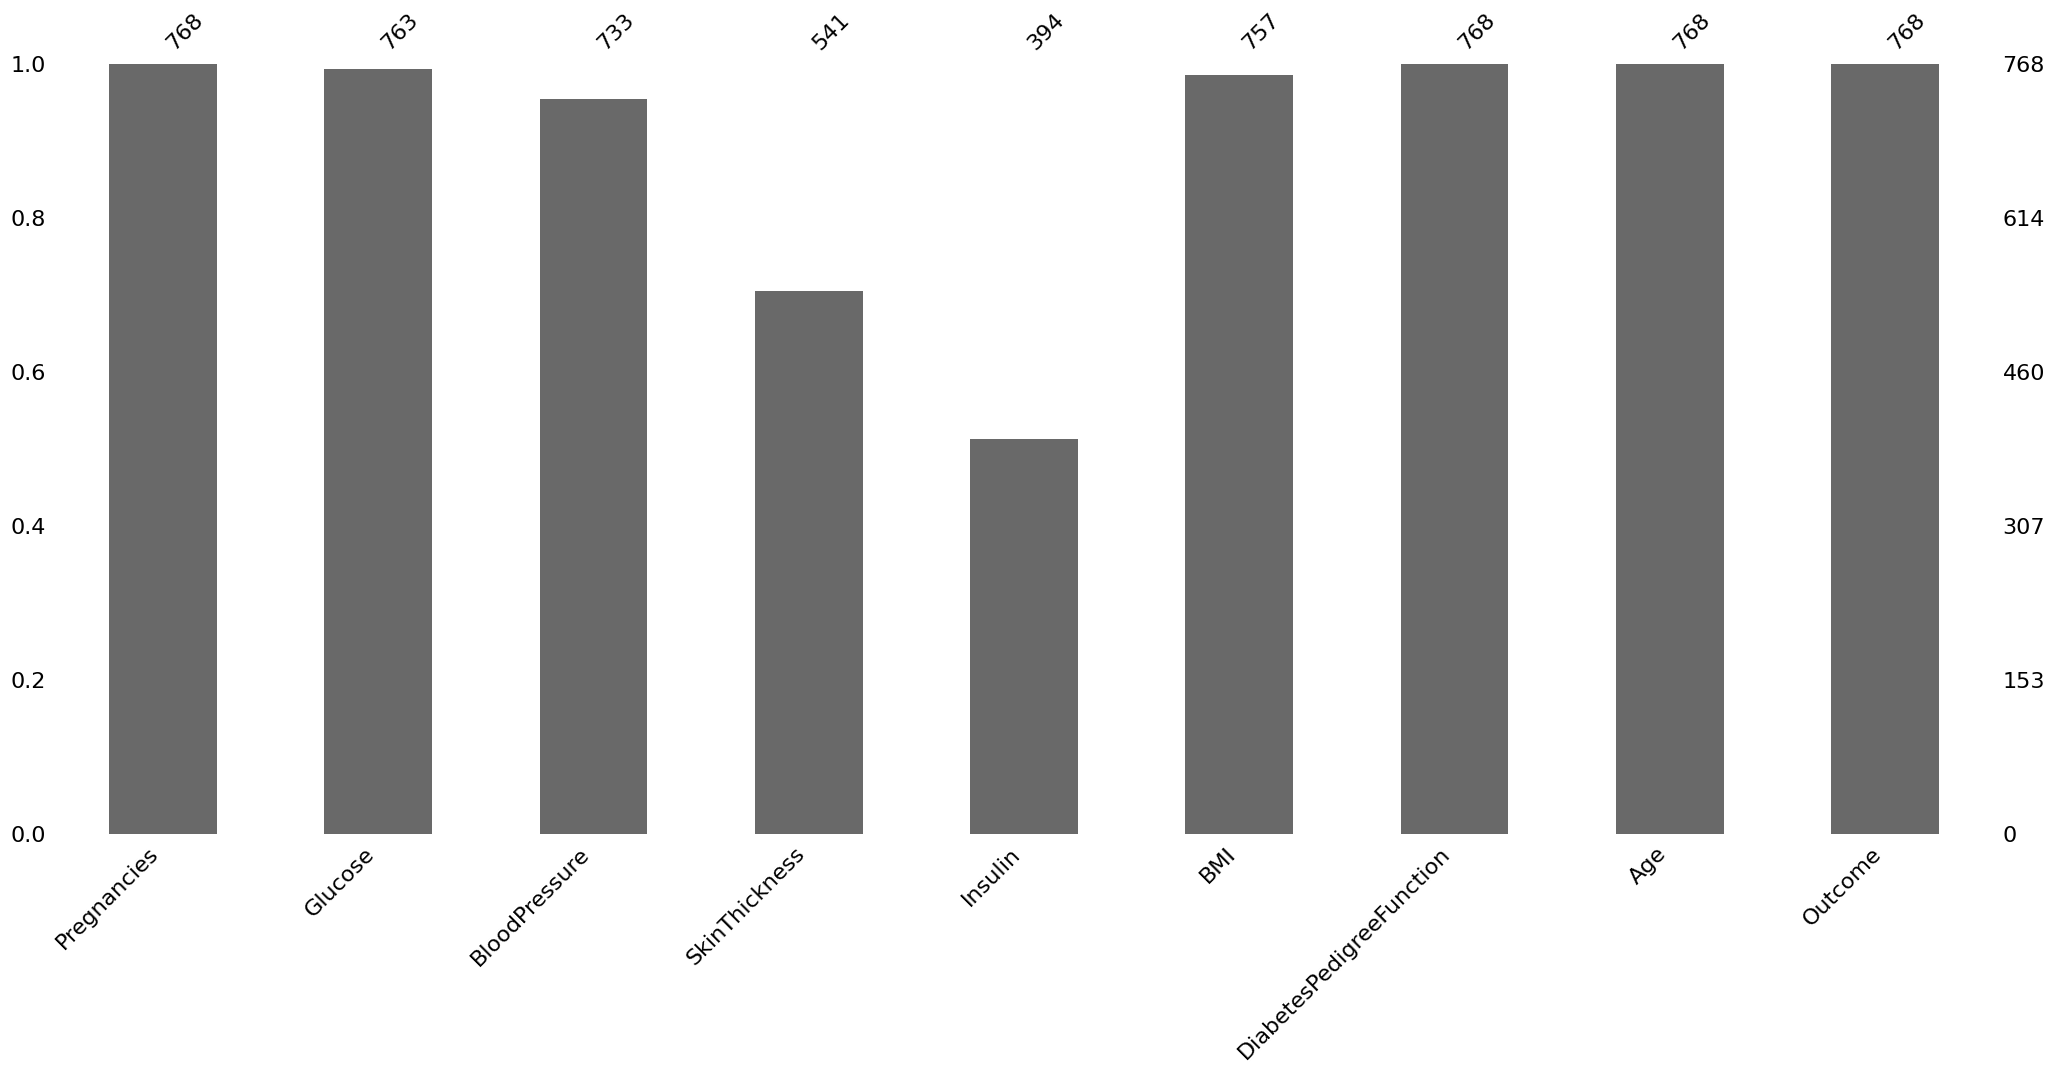

In [ ]:
# Dung Missingno Library bieu dien su phan bo cua cac gia tri null.
import missingno as msno
msno.bar(df);

In [ ]:
# Tinh gia tri trung vi o moi truong du lieu
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# Gan trung vi cua nguoi khong bi benh cho gia tri thieu cua nguoi khong bi benh. Tuong tu cho nguoi bi benh
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Quan sat su phan bo cua du lieu thieu sau khi xu ly
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 1.3) Outlier Observation Analysis

In [ ]:
# Xac dinh gia tri outlier
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


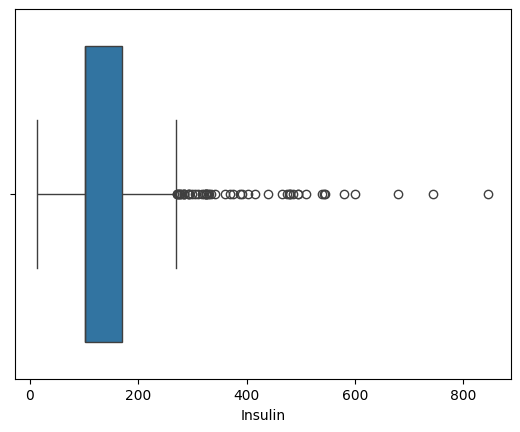

In [ ]:
# Bieu dien du lieu cua truong Insulin de quan sat gia tri ngoai lai.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [ ]:
#Xac dinh va loai tru cac gia tri ngoai lai
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

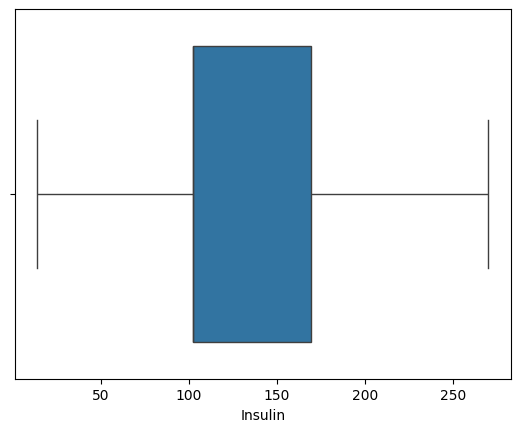

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

## 1.4)  Local Outlier Factor (LOF)

In [ ]:
# Su dung phuong thuc LOF de xu ly cac gia tri ngoai lai
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [ ]:
#Xac dinh threshold
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [ ]:
#Xoa thanh phan lon hon threshold
outlier = df_scores > threshold
df = df[outlier]

In [ ]:
# Kich thuoc cua tap du lieu.
df.shape

(768, 9)

# 2) Exploratory Data Analysis

In [ ]:
# Hien thi 5 hang dau tien de nhap du lieu
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Cung cap thong tin tong quan ve tap du lieu (so luong hang va cot, cac kieu du lieu cua cac cot va tong so luong gia tri
# khac null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# Tom tat thong ke mo ta cho cac cot du lieu so trong tap du lieu bao gom so luong, gia tri trung binh, do lech chuan, gia
# tri lon nhat, nho nhat va cac phan vi
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,133.085938,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,58.124185,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,270.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Tim ra so tuoi cao nhat va thap nhat
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


Text(0.5, 1.0, 'Age Distribution')

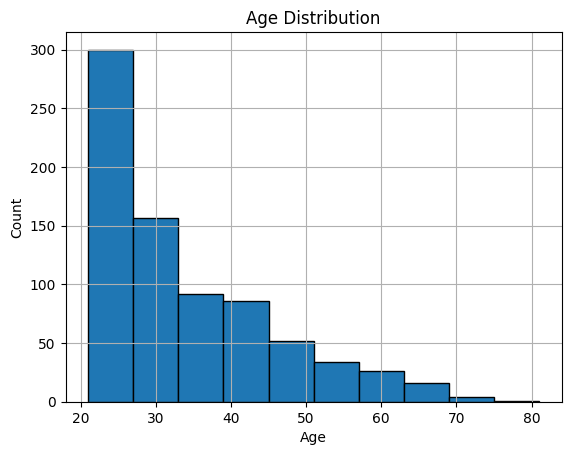

In [ ]:
# The hien muc do phan phoi cua du lieu tuoi trong tap du lieu
df["Age"].hist( edgecolor = "black", bins = 10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

<Axes: xlabel='BMI', ylabel='Density'>

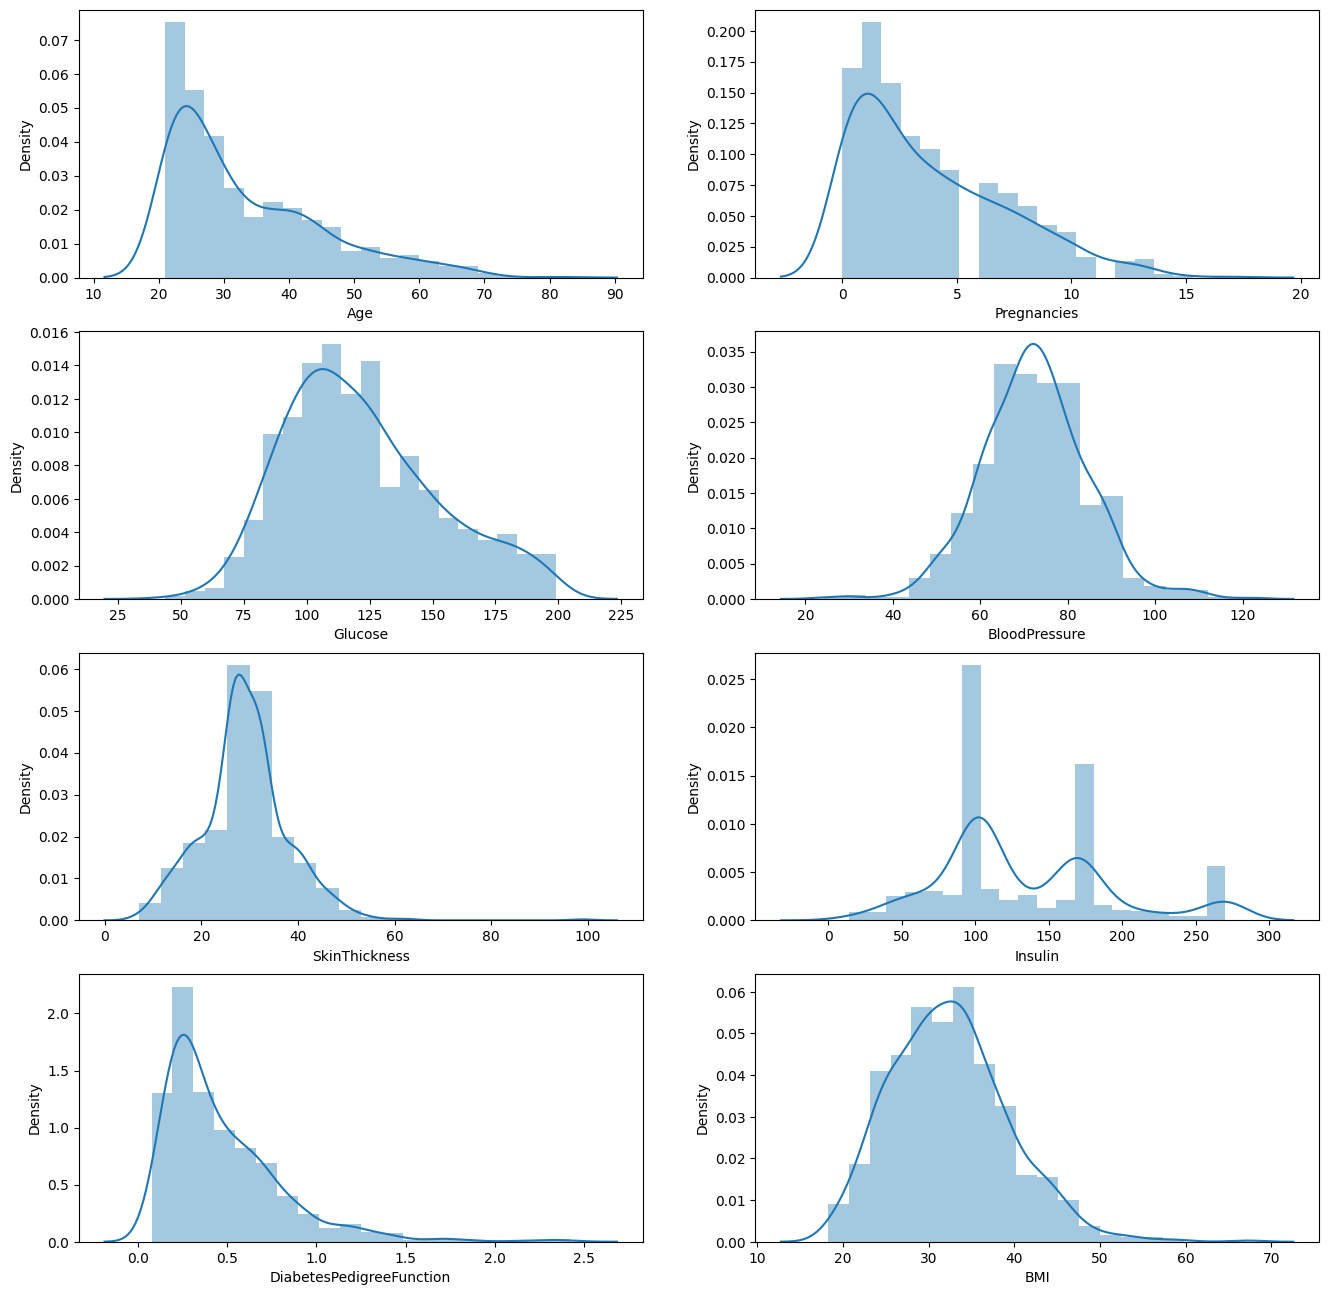

In [ ]:
# Bieu dien su phan phoi du lieu va uoc luong phan phoi xac suat cua cac gia tri trong bien so da duoc truy cap
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [ ]:
# Tinh so lan mang thai trung binh va so lan mang thai cao nhat dua tren du lieu cua cot "OutCome"
df.groupby("Outcome").agg({"Pregnancies":["mean","max"]})

Pregnancies    
               mean max
Outcome                
0          3.298000  13
1          4.865672  17

In [ ]:
# Tinh do tuoi trung binh va do tuoi cao nhat dua tren du lieu cua cot "OutCome"
df.groupby("Outcome").agg({"Age":["mean","max"]})

Age    
              mean max
Outcome               
0        31.190000  81
1        37.067164  70

In [ ]:
# Tinh gia tri trung binh va cao nhat cua nong do Insulin dua tren du lieu cua cot "OutCome"
df.groupby("Outcome").agg({"Insulin": ["mean","max"]})

Insulin       
               mean    max
Outcome                   
0        111.794000  270.0
1        172.809701  270.0

In [ ]:
# Tinh gia tri trung binh va cao nhat cua nong do Glucose dua tren du lieu cua cot "OutCome"
df.groupby("Outcome").agg({"Glucose": ["mean","max"]})

Glucose       
               mean    max
Outcome                   
0        110.622000  197.0
1        142.302239  199.0

In [ ]:
# Tinh gia tri trung binh cua chi so khoi co the dua tren du lieu cua cot "OutCome"
df.groupby("Outcome").agg({"BMI": ["mean","max"]})

BMI      
              mean   max
Outcome                 
0        30.879074  57.3
1        35.047148  52.9

In [ ]:
# Dem so lan xuat hien cua du lieu trong cot "OutCome"
df1 = df["Outcome"].value_counts()
df1

Outcome
0    497
1    263
Name: count, dtype: int64

In [ ]:
# Kiem tra su phan phoi cua du lieu trong cot "OutCome"
df2 = df["Outcome"].value_counts()*100/len(df)
df2

Outcome
0    65.394737
1    34.605263
Name: count, dtype: float64

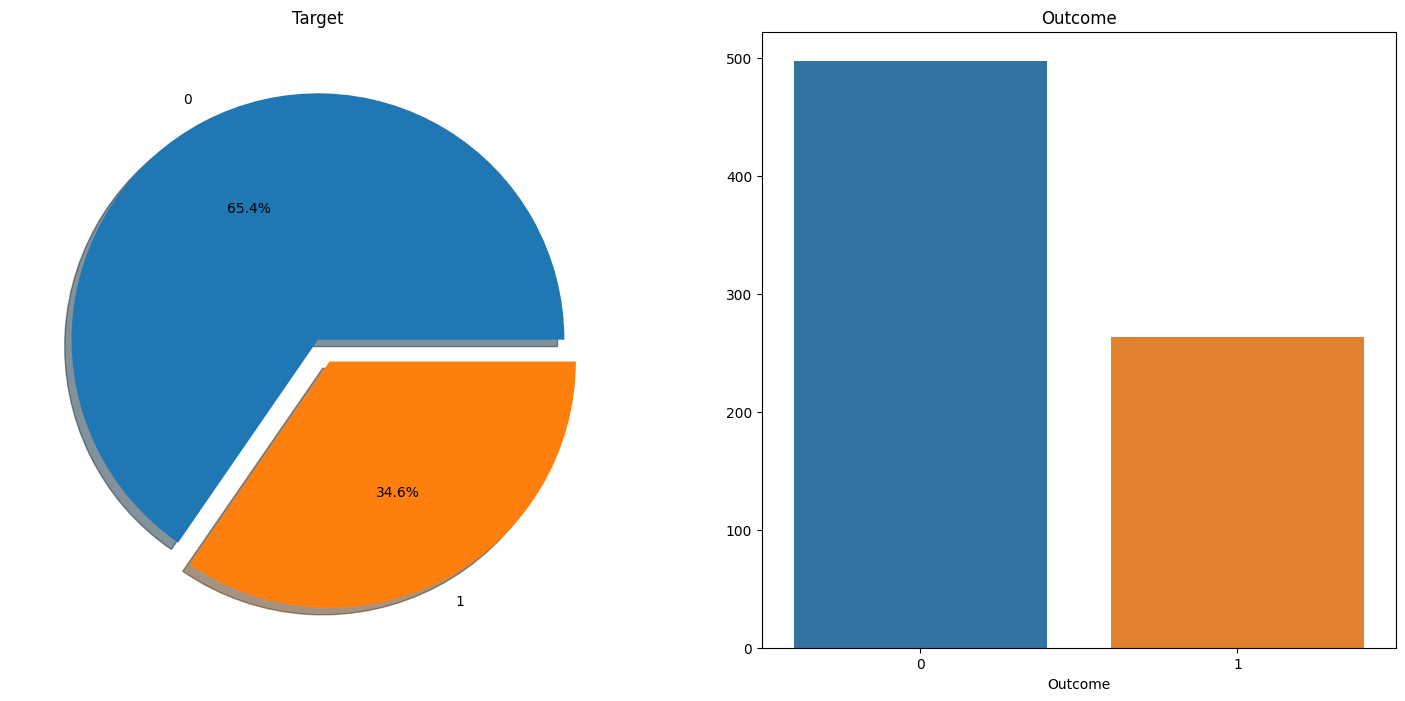

In [ ]:
# Su phan phoi cua bien ket qua trong du lieu da duoc kiem tra va truc quan hoa
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# Ve bieu do tron
df2.plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
# Ve bieu do cot
sns.barplot(x=df1.index, y=df1.values, palette=["#1f77b4", "#ff7f0f"])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
# Hien thi ma tran tuong quan giua cac cap bien trong tap du lieu
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.112630,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.543188,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.116425,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.237531,0.566086,0.106280,0.129537,0.295138
Insulin,0.112630,0.543188,0.116425,0.237531,1.000000,0.289534,0.144405,0.162335,0.500678
BMI,0.023890,0.236171,0.286399,0.566086,0.289534,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.144405,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.162335,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.500678,0.315577,0.173844,0.238356,1.000000


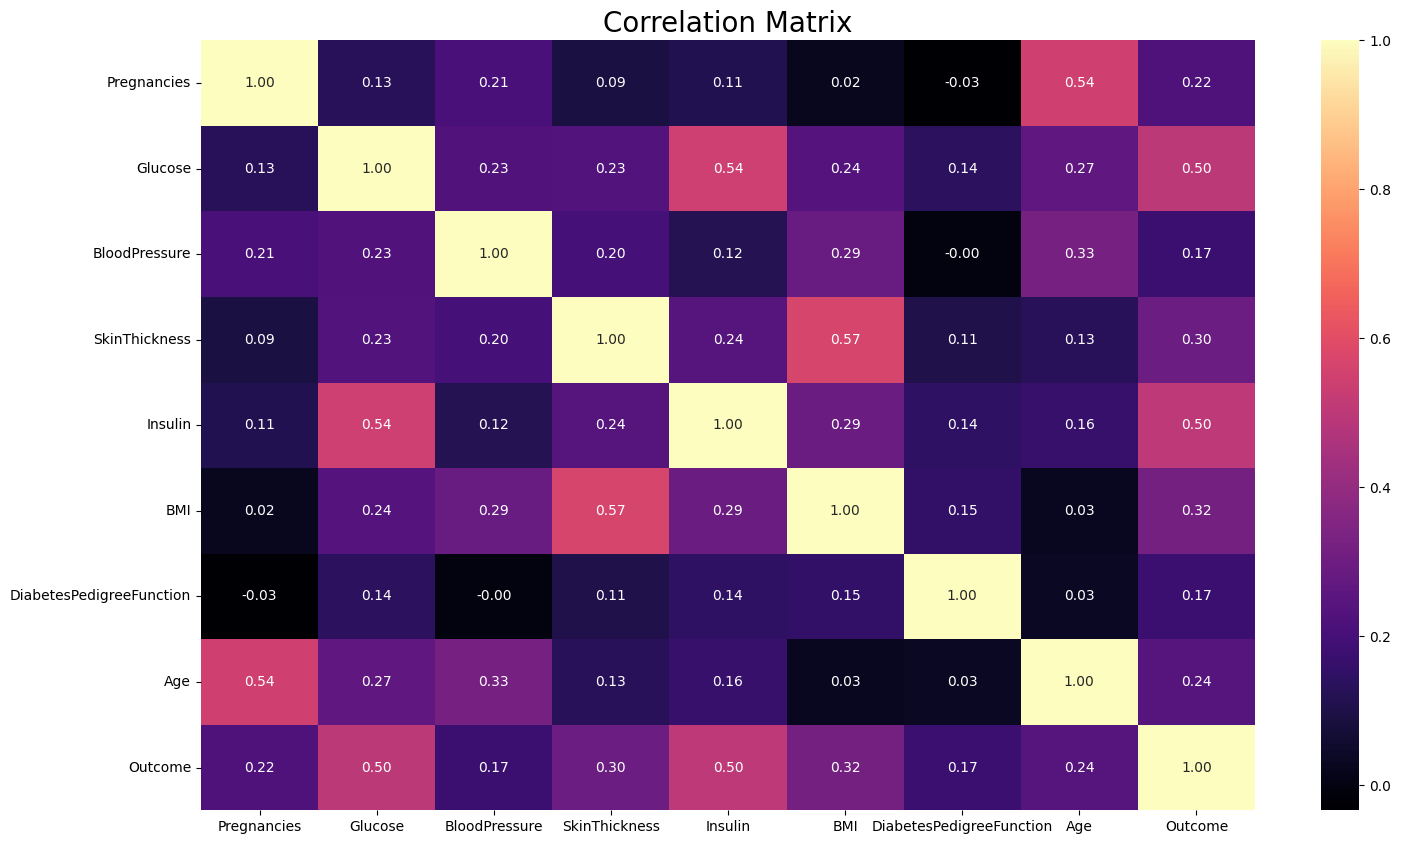

In [ ]:
# Hien thi ma tran tuong quan cua do thi
plt.figure(figsize=(17, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="magma")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

# 3) Feature Engineering

Việc tạo ra các trường dữ liệu mới được đánh giá là quan trọng cho mô hình. Nhưng ta cần phải tạo một
trường dữ liệu mới thật sự hợp lý. Đối với tập dữ liệu hiện tại, có một số trường dữ liệu mới cần thiết và
sẽ được tạo nên dựa vào chỉ số BMI, Insulin và glucose

In [ ]:
# Ta tao truong du lieu moi NewBMI theo phan loai tung khoang gia tri cua BMI
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [ ]:
# Quy trinh phan loai cac khoang gia tri cua Insulin
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# Ap dung quy trinh tren de tao ra 1 truong du lieu NewInsulinScore
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
# Phan loai theo khoang gia tri cua Glucose.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


# 4) One Hot Encoding

Biến đổi các biến định tính (categorical) trong tập dữ liệu thành các giá trị số là cần thiết. Do đó, quá
trình chuyển đổi này được thực hiện bằng phương pháp Label Encoding và One Hot Encoding

In [ ]:
# Bang cach ap dung One Hot Encoding, cac truong du lieu dung de phan loai da duoc chuyen doi thanh cac gia tri so.
# Tránh lỗi Dummy variable trap
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [ ]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# Việc chuẩn hóa các biến trong tập dữ liệu là một yếu tố hiệu quả giúp nâng cao hiệu suất của các mô hình.
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [ ]:
X = pd.concat([X,categorical_df], axis = 1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,True,False,False,False,False,False,False,False,False,True
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,False,False,True,False,True,False,True,False,False
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,False,False,False,False,False,False,False,False,True
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,False,False,True,False,True,False,True,False,False
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 5) Base Models

In [ ]:
# lần lượt đánh giá các model như LogisticRegression, K-Nearest Neighbors, Decision Tree, Random Forest và Support Vector Machine

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))

# Đánh giá lần lượt các model trong mảng
results = []
names = []

LR: 0.848684 (0.036866)
KNN: 0.840789 (0.023866)
CART: 0.857895 (0.024826)
RF: 0.881579 (0.026316)
SVM: 0.853947 (0.036488)


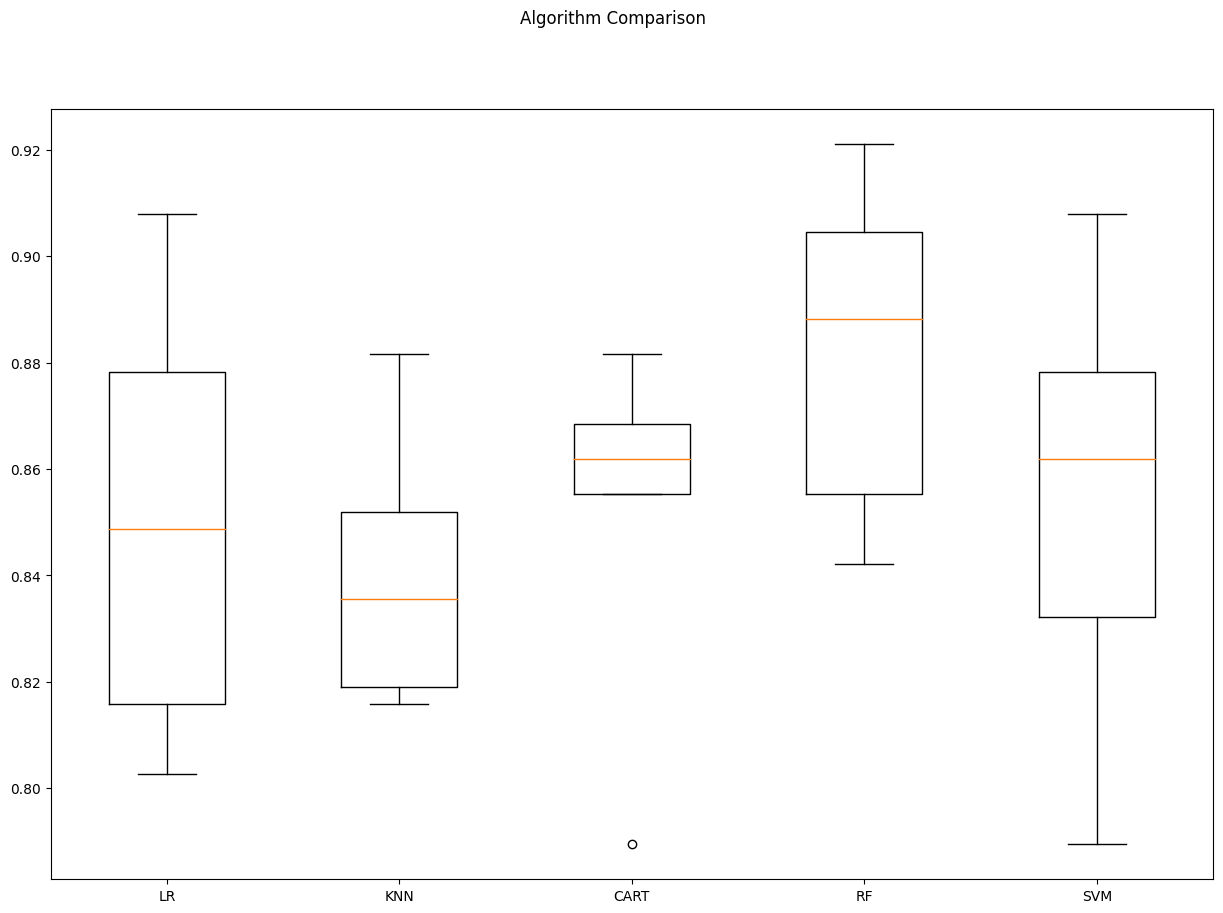

In [ ]:
for name, model in models:

        kfold = KFold(n_splits=10, shuffle=True, random_state=12345)  # Set shuffle=True
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# Su dung Boxlot de so sanh thuat toan
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) Model Tuning

### Random Forests Tuning

In [ ]:
# Tập hợp các giá trị hyperparameter để tối ưu hóa mô hình random forest
rf_params = {"n_estimators" :[100,200,500,1000],
             "max_features": [3,5,7],
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [ ]:
# Chọn mô hình random forest với random_state=12345
rf_model = RandomForestClassifier(random_state = 12345)

In [ ]:
# Dùng hàm gridSearchCV để tìm tổ hợp hyperparameter tốt nhất
gs_cv = GridSearchCV(rf_model,
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

In [ ]:
# Kết quả thu được

### Final Model Installation

In [ ]:
# Xây dựng mô hình random forest từ các tổ hợp hyperparamter tối ưu trên
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [ ]:
# Chia data set thành 2 tập : tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện mô hình trên tập train
rf_tuned = rf_tuned.fit(X_train,y_train)

In [ ]:
# Đánh gía hiệu suất
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8880382775119617

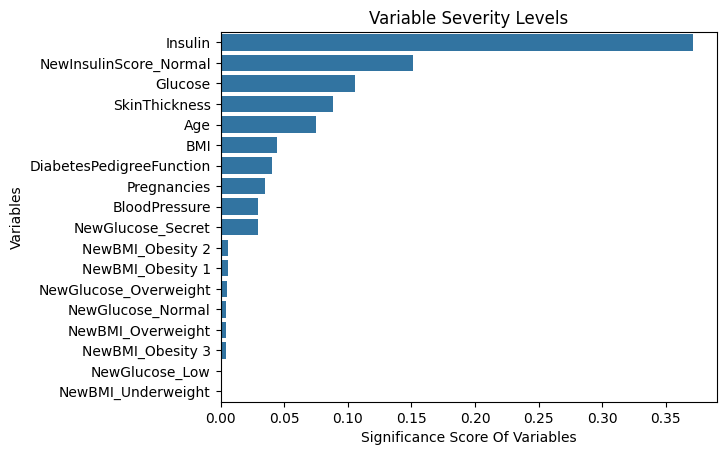

In [ ]:
# K
feature_imp = pd.Series(rf_tuned.feature_importances_,
index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel(’Significance␣Score␣Of␣Variables’)
plt.ylabel(’Variables’)
plt.title("Variable␣Severity␣Levels")
plt.show()



In [ ]:
train_pred = rf_tuned.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.9690553745928339

In [ ]:
# Đánh giá trên tập kiểm tra
test_pred = rf_tuned.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_accuracy

0.8701298701298701

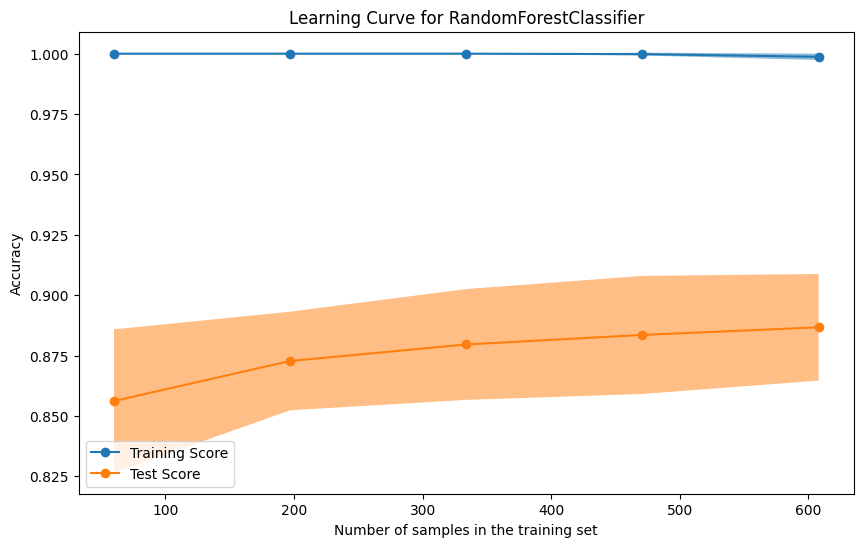

In [ ]:
# Kiểm tra mức độ chính xác của mô hình khi tăng thêm mẫu cho tập huấn luyện
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)
common_params = {
"X": X,
"y": y,
"train_sizes": np.linspace(0.1, 1.0, 5),
"cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
"score_type": "both",
                  "n_jobs": 4,
"line_kw": {"marker": "o"},
"std_display_style": "fill_between",
"score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rf_tuned]):
LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training␣Score", "Test␣Score"])
ax.set_title(f"Learning␣Curve␣for␣{estimator.__class__.__name__}")
plt.show()


In [ ]:
# So sánh độ chính xác của mô hình với tập dataset
y_pred = rf_tuned.predict(X[:10])
print(y_pred)
print(y[:10].to_numpy())

[1 0 1 0 1 0 1 0 1 1]
[1 0 1 0 1 0 1 0 1 1]


# 8) Reporting


1) Mục tiêu:

Phân tích dữ liệu về bệnh tiểu đường để hiểu rõ hơn về các yếu tố nguy cơ và xây dựng mô hình dự đoán nguy cơ mắc bệnh cho bệnh nhân.

2) Nguồn Dữ liệu:

Sử dụng bộ dữ liệu về bệnh tiểu đường bao gồm thông tin về các yếu tố nguy cơ và tình trạng bệnh tiểu đường từ Viện Tiểu đường, Tiêu hóa và Bệnh thận Quốc gia.

3) Phân tích Dữ liệu:

- Cấu trúc Dữ liệu:
Dữ liệu dạng bảng với 9 yếu tố nguy cơ (tuổi, giới tính, BMI, huyết áp, đường huyết, insulin, độ dày da, số lần mang thai) và 1 biến kết quả (có bị bệnh tiểu đường hay không).
- Kiểm tra Dữ liệu:
   + Phát hiện các giá trị thiếu (0) trong tập dữ liệu, chủ yếu ở biến "Số lần mang thai".
   + Thay thế các giá trị thiếu bằng giá trị NaN (Not a Number).
   + Sử dụng phương pháp LOF (Local Outlier Factor) để xác định và loại bỏ các ngoại lệ trong dữ liệu.
- Chuẩn hóa Dữ Liệu:
Áp dụng phương pháp chuẩn hóa RobustScaler để đảm bảo dữ liệu có cùng thang đo.

4) Xây dựng Mô hình Dự đoán:

- Phương pháp:
Sử dụng các mô hình học máy phổ biến: Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Classification and Regression Trees (CART), Random Forests.
- Đánh giá Mô hình:
  + Sử dụng phương pháp Cross-Validation để đánh giá hiệu suất của các mô hình.
  + Tính toán điểm Cross-Validation Score cho mỗi mô hình.
- Kết quả:
Mô hình Random Forests sau khi tối ưu hóa siêu tham số đạt được hiệu suất dự đoán tốt nhất với điểm Cross-Validation Score cao nhất.

5) Kết luận:

- Qua quá trình phân tích dữ liệu và xây dựng mô hình, chúng ta đã có thể hiểu rõ hơn về các yếu tố nguy cơ mắc bệnh tiểu đường và dự đoán nguy cơ mắc bệnh cho bệnh nhân với độ chính xác cao.
- Mô hình Random Forests sau khi tối ưu hóa là công cụ hữu ích để hỗ trợ chẩn đoán và phòng ngừa bệnh tiểu đường hiệu quả.

